<a href="https://colab.research.google.com/github/dsercam/TC033/blob/main/TC5033_Activity3b_IDGroup44.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#<font color='darkorange'><b> TC 5033 :: Advanced Machine Learning Methods </b> </font>
### <font color='darkgray'><b> Activity 2b: Building a CNN for *CIFAR10 Dataset* with PyTorch </b></font></br></br>
###<font color='darkblue'><b>  Group 44 </b></font>
***Dante Rodrigo Serna Camarillo A01182676***</br>


<!--
***Axel Alejandro Tlatoa Villavicencio A01363351***</br>
***Carlos Roberto Torres Ferguson A01215432***</br>
***Felipe de Jesús Gastélum Lizárraga A01114918***
-->

## TC 5033
### Word Embeddings

<br>

#### Activity 3b: Text Classification using RNNs and AG_NEWS dataset in PyTorch
<br>

- Objective:
    - Understand the basics of Recurrent Neural Networks (RNNs) and their application in text classification.
    - Learn how to handle a real-world text dataset, AG_NEWS, in PyTorch.
    - Gain hands-on experience in defining, training, and evaluating a text classification model in PyTorch.
    
<br>

- Instructions:
    - Data Preparation: Starter code will be provided that loads the AG_NEWS dataset and prepares it for training. Do not modify this part. However, you should be sure to understand it, and comment it, the use of markdown cells is suggested.

    - Model Setup: A skeleton code for the RNN model class will be provided. Complete this class and use it to instantiate your model.

    - Implementing Accuracy Function: Write a function that takes model predictions and ground truth labels as input and returns the model's accuracy.

    - Training Function: Implement a function that performs training on the given model using the AG_NEWS dataset. Your model should achieve an accuracy of at least 80% to get full marks for this part.

    - Text Sampling: Write a function that takes a sample text as input and classifies it using your trained model.

    - Confusion Matrix: Implement a function to display the confusion matrix for your model on the test data.

    - Submission: Submit your completed Jupyter Notebook. Make sure to include a markdown cell at the beginning of the notebook that lists the names of all team members. Teams should consist of 3 to 4 members.
    
<br>

- Evaluation Criteria:

    - Correct setup of all the required libraries and modules (10%)
    - Code Quality (30%): Your code should be well-organized, clearly commented, and easy to follow. Use also markdown cells for clarity. Comments should be given for all the provided code, this will help you understand its functionality.
    
   - Functionality (60%):
        - All the functions should execute without errors and provide the expected outputs.
        - RNN model class (20%)
        - Accuracy fucntion (10%)
        - Training function (10%)
        - Sampling function (10%)
        - Confucion matrix (10%)

        - The model should achieve at least an 80% accuracy on the AG_NEWS test set for full marks in this criterion.


Dataset

https://pytorch.org/text/stable/datasets.html#text-classification

https://paperswithcode.com/dataset/ag-news


### <font color="darkblue"> **Import libraries** </font>

In [ ]:
# conda install -c pytorch torchtext
# conda install -c pytorch torchdata
# conda install pytorch torchvision torchaudio cudatoolkit=10.2 -c pytorch



*   List item
*   List item


> <font color='darkorange'> We install all the required modules </font>


In [1]:
!pip install scikit-plot
!pip install torchdata
!pip install tokenizers
!pip install portalocker

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.8/3.8 MB 12.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 295.0/295.0 kB 20.7 MB/s eta 0:00:00


In [2]:
# The following libraries are required for running the given code
# Please feel free to add any libraries you consider adecuate to complete the assingment.
import numpy as np
import portalocker
#PyTorch libraries
import torch
from torchtext.datasets import AG_NEWS
# Dataloader library
from torch.utils.data import DataLoader
from torch.utils.data.dataset import random_split
# Libraries to prepare the data
from torchtext.data.utils import get_tokenizer
from torchtext.vocab import build_vocab_from_iterator
from torchtext.data.functional import to_map_style_dataset
# neural layers
from torch import nn
from torch.nn import functional as F

# These libraries are suggested to plot confusion matrix
# you may use others
import scikitplot as skplt
import matplotlib.pyplot as plt #colored confusion matrix
import gc

from torch.optim import Adam
#import accuracy_score function, one for a classification report to test our test set, and confusion_matrix
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


In [3]:
# Use GPU if available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(device)

cuda


### <font color="darkblue"> **1.Get the train and the test datasets and dataloaders** </font>

Classes:

* 1 - World

* 2 - Sports

* 3 - Business

* 4 - Sci/Tech

We will convert them to:

* 0 - World

* 1 - Sports

* 2 - Business

* 3 - Sci/Tech



> <font color='darkblue'> Loading the AG_NEWS() set. </font>

In [4]:
#note that the AG_NEWS() method returns two data sets, the first one referes to the training set and the second one to the test data set
train_dataset, test_dataset = AG_NEWS()
train_dataset, test_dataset = to_map_style_dataset(train_dataset), to_map_style_dataset(test_dataset)


> <font color='darkblue'> Note that the training set has a size of 120,000 and the test set of 7,600 </font>

In [5]:
print(len(train_dataset), len(test_dataset))

120000 7600



> <font color='darkblue'> Define our tokeniser function </font>

In [6]:
# Get the tokeniser
# tokeniser object
tokeniser = get_tokenizer('basic_english')

def yield_tokens(data):
    for _, text in data:
        yield tokeniser(text)


> <font color='darkblue'> Build our vocubalary using the tokens found in our training data set. </font><br>
> <font color='darkblue'> Add a token for any unknown/non-matching value. Set it as \<unk>. </font>

In [7]:
# Build the vocabulary
vocab = build_vocab_from_iterator(yield_tokens(train_dataset), specials=["<unk>"])
#set unknown token at position 0
vocab.set_default_index(vocab["<unk>"])


> <font color='darkblue'> Length of our vocabulary is 95,811 tokens </font>

In [8]:
len(vocab)

95811


> <font color='darkblue'> Lets see how this works: </font><br>
>> We use a sample text or phrase <br>
>> We tokenize our text using the _tokeniser_ function <br>
>> we can refer to the value of each of our phrasse _tokens_ in our _vocabulary_ <br>
>> NOTE! See how an unfamiliar/non matching value in our _vocab_ is match to the unkown vocab.

In [9]:
#test tokens
tokens = tokeniser('Welcome to TE3007')

print(tokens, vocab(tokens)) #these are the references/indexes of each one of our tokens
#See how TE3007 which was an unknown token, is mapped to the the unkown entry on our vocab (we set it at index 0 in the last code section)

['welcome', 'to', 'te3007'] [3314, 4, 0]



> <font color='darkblue'> Lets build a validation set, whe are going to build it to a 90-10 proportion using our training data set. </font>

In [10]:
NUM_TRAIN = int(len(train_dataset)*0.9) # 90 percent
NUM_VAL = len(train_dataset) - NUM_TRAIN # 10 percent

### <font color="darkblue"> **1.1 Final build of our training, test and validation sets** </font>


> <font color='darkblue'> Get our validation set using a random split of our training set. </font>

In [11]:
train_dataset, val_dataset = random_split(train_dataset, [NUM_TRAIN, NUM_VAL])



> <font color='darkblue'> Final sizes of our data sets. </font>

In [12]:
print(len(train_dataset), len(val_dataset), len(test_dataset))

108000 12000 7600


### <font color="darkblue"> **2. build our collate funciton for our batches** </font>

> Updated the max_tokens value from 25 to 50, this gave better accuracy result.

In [13]:
# function passed to the DataLoader to process a batch of data as indicated
def collate_batch(batch,max_tokens=50):
    # Get label and text
    y, x = list(zip(*batch))

    # Create list with indices from tokeniser
    x = [vocab(tokeniser(text)) for text in x]
    x = [t + ([0]*(max_tokens - len(t))) if len(t) < max_tokens else t[:max_tokens] for t in x]

    # Prepare the labels, by subtracting 1 to get them in the range 0-3
    return torch.tensor(x, dtype=torch.int32), torch.tensor(y, dtype=torch.int32) - 1

In [14]:
labels =  ["World", "Sports", "Business", "Sci/Tech"]
#max_tokens = 50 #already defined and defaulted it to 50
BATCH_SIZE = 256

> The sets are finalized as iterable DataLoaders, we use our collate function.

In [15]:
train_loader = DataLoader(train_dataset, batch_size=BATCH_SIZE, collate_fn=collate_batch, shuffle = True)
val_loader = DataLoader(val_dataset, batch_size=BATCH_SIZE, collate_fn=collate_batch, shuffle = True)
test_loader = DataLoader(test_dataset, batch_size=BATCH_SIZE, collate_fn=collate_batch, shuffle = True)

### <font color="darkblue"> **3. Let us build our RNN model** </font>###

> Architecture with 3 layers </br>

>>> _Embeddings layer_ </br>
>>> _RNN layer_ </br>
>>> _Linear layer_ </br>



In [18]:
EMBEDDING_SIZE = 25
NEURONS = 50
LAYERS = 1
NUM_CLASSES = 4

class RNN_Model_1(nn.Module):
    def __init__(self, embed_size, hidden, layers, num_classes):
        super().__init__()
        #defined by the length of our vocabulary, with an embedding size of 50 each
        self.embedding_layer = nn.Embedding(num_embeddings=len(vocab), embedding_dim=embed_size)

        #Chose nn.RNN to implement this.
        self.rnn = nn.RNN(input_size=embed_size, hidden_size=hidden, num_layers=layers, batch_first=True)

        # created a linear layer for output [sized hidden layers X number of classes (4)]
        self.fc = nn.Linear(hidden, num_classes)

    def forward(self, x):
        embeddings = self.embedding_layer(x)
        output, hid   = self.rnn(embeddings, torch.randn(LAYERS, len(x), NEURONS))
        return self.fc(output[:,-1])

> Instantiate our model with the selcted values

In [19]:
rnn = RNN_Model_1(EMBEDDING_SIZE, NEURONS, LAYERS, NUM_CLASSES)
rnn

RNN_Model_1(
  (embedding_layer): Embedding(95811, 25)
  (rnn): RNN(25, 50, batch_first=True)
  (fc): Linear(in_features=50, out_features=4, bias=True)
)

### <font color="darkblue"> **4. Accuracy method** </font>###

> Two parametes, our model and the data loader.

In [22]:
def accuracy(model, loader):
    #no cummulative gradient
    with torch.no_grad():
      Yreal = []
      Yhat = []
      # x, data; y, predictions
      # we use our validation data loader to calculate the accuracy
      for X, Y in val_loader:
            preds = model(X) # predicitons of the model
            Yreal.append(Y) # collect real values
            Yhat.append(preds.argmax(dim=-1)) # collect predictions

      Yreal = torch.cat(Yreal) #concatenate tensors
      Yhat = torch.cat(Yhat) #concatenate tensors
      # use the sklearn accuracy fucntion to cualcualte accuracy using predicitons vs actual classification.
      print("Accuracy :: {:.3f}".format(accuracy_score(Yreal.detach().numpy(), Yhat.detach().numpy())))



### <font color="darkblue"> **5. Training method** </font>###

> Two parametes, our model and the data loader.

In [23]:
def train(model, optimiser, epochs=100):
    #use cross entropy to calculate loss
    lossFunction = nn.CrossEntropyLoss()
    for i in range(1, epochs+1):
        print("Epoch #",i)
        losses = []
        #Train using our train data loader
        for X, Y in train_loader:
            Y = Y.type(torch.LongTensor) #cast to long tensor to avoid runtime error
            X = X.type(torch.LongTensor) #cast to long tensor to avoid runtime error

            Yhat = model(X)
            #track loss
            loss = lossFunction(Yhat, Y)
            losses.append(loss.item())
            #reste gradient calulcation
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

        print("Training Loss as :: {:.2f}".format(torch.tensor(losses).mean()))
        #calculate the accuracy of the trained modal against our validation data loader
        accuracy(model, val_loader)


### <font color="darkblue"> **6. Training Stage** </font>###

> Train for 15 epochs </br>
> Defined learning rate as 1e-3 </br>
> use an Adam optimizer </br>

In [24]:
EPOCHS = 15
LEARNING_RATE = 1e-3

# Instantiate our Adam optimizer, set defined learning rate
optimizer = Adam(rnn.parameters(), lr=LEARNING_RATE)

#train our RNN model, using our adam optimizer for 15 epochs
train(rnn, optimizer, EPOCHS)

Epoch # 1
Training Loss as :: 1.36
Accuracy :: 0.384
Epoch # 2
Training Loss as :: 1.26
Accuracy :: 0.436
Epoch # 3
Training Loss as :: 1.06
Accuracy :: 0.657
Epoch # 4
Training Loss as :: 0.77
Accuracy :: 0.761
Epoch # 5
Training Loss as :: 0.60
Accuracy :: 0.807
Epoch # 6
Training Loss as :: 0.51
Accuracy :: 0.829
Epoch # 7
Training Loss as :: 0.45
Accuracy :: 0.837
Epoch # 8
Training Loss as :: 0.41
Accuracy :: 0.850
Epoch # 9
Training Loss as :: 0.37
Accuracy :: 0.857
Epoch # 10
Training Loss as :: 0.34
Accuracy :: 0.862
Epoch # 11
Training Loss as :: 0.32
Accuracy :: 0.863
Epoch # 12
Training Loss as :: 0.30
Accuracy :: 0.866
Epoch # 13
Training Loss as :: 0.28
Accuracy :: 0.854
Epoch # 14
Training Loss as :: 0.27
Accuracy :: 0.876
Epoch # 15
Training Loss as :: 0.26
Accuracy :: 0.871


### <font color="darkblue"> **6. Sampling Function** </font>###

> Two parameters our model and a data loader

In [26]:
def sample_text(model, loader):
    Yreal = []
    Yhat  = []
    for X, Y in loader:
        Y = Y.type(torch.LongTensor) # cast to avoid runtime errors
        X = X.type(torch.LongTensor) # cast to avoid runtime errors
        # make predictions
        predictions = model(X)
        Yhat.append(predictions) #collect predictions
        Yreal.append(Y)  # collect real classificaitons
    gc.collect()
    Yhat = torch.cat(Yhat)
    Yreal = torch.cat(Yreal)
    #return real classifications values as first outpur, predictions tenosr with an applied softmax as second output
    return Yreal.detach().numpy(), F.softmax(Yhat, dim=-1).argmax(dim=-1).detach().numpy()

 > Lets use our test data loader with the sampling fucntion

In [27]:
# recover real classifications, predictions of out test data loader using our trained model
Yactual, Yhat = sample_text(rnn, test_loader)

### <font color="darkblue"> **7. Plot confusion matrix.** </font>###

In [28]:
print("Accuracy using test data laoder :: {}".format(accuracy_score(Yactual, Yhat))) #use skelarn to calculate accuracy, use the outputs of the sampling function


Accuracy using test data laoder : 0.8717105263157895


In [29]:
print("Confusion Matrix as :: ")
print(confusion_matrix(Yactual, Yhat))

Confusion Matrix as :: 
[[1622   83  157   38]
 [  63 1796   15   26]
 [  63   18 1648  171]
 [  35   71  235 1559]]


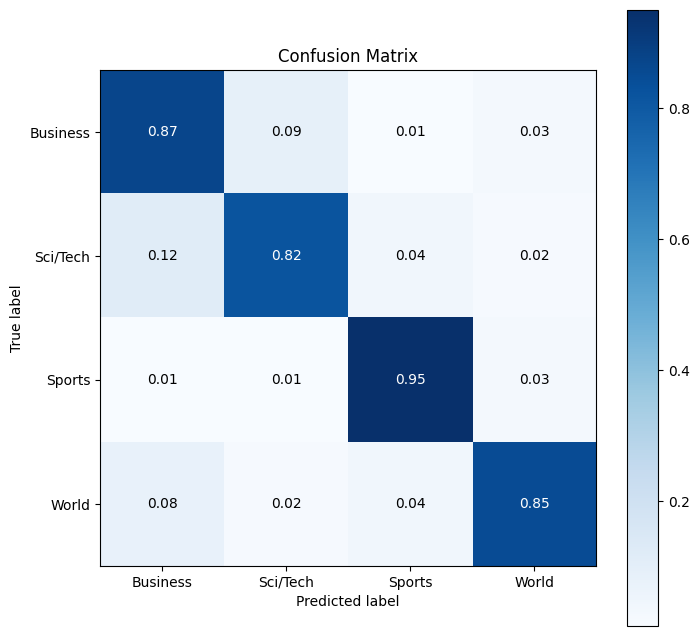

In [30]:
#Use skplt plot confusion matrix function
skplt.metrics.plot_confusion_matrix([labels[i] for i in Yactual], [labels[i] for i in Yhat],
                                    normalize=True,
                                    title="Confusion Matrix",
                                    cmap="Blues",
                                    figsize=(8,8)
                                    );